In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

# set default matplotlib fontsize to 13
plt.rcParams.update({'font.size': 13})

# Load the data
df1 = pd.read_csv('/home/ilin/Documents/2024_04_HIP67522_ATCA/results/20240611/timeseries/timeseries.csv')

# read tstart with np.loadtxt
tstart = str(np.loadtxt('/home/ilin/Documents/2024_04_HIP67522_ATCA/results/20240611/timeseries30/tstart.txt', dtype=str))

# convert num which is in hours  to a  column with a time stamp 
df1['time'] = [pd.to_datetime('2024-06-11 ' + f"{num:02d}" + tstart[2:]) for num in df1['num'].values] 

df1['jd'] = df1['time'].apply(lambda x: x.to_julian_date())

# read in the 30 min cadence data
df30 = pd.read_csv('/home/ilin/Documents/2024_04_HIP67522_ATCA/results/20240611/timeseries30/timeseries.csv').iloc[:-1]

# convert num which is in hours  to a  column with a time stamp
df30['time'] = pd.to_datetime("2024-06-11 " + df30['num'].str.replace("_", ":") + ":" + tstart[-2:])

# convert datetime to jd
df30['jd'] = df30['time'].apply(lambda x: x.to_julian_date())

# convert jd to seconds
df30['time_seconds'] = (df30['jd'] - df30['jd'].min()) * u.day.to(u.s)



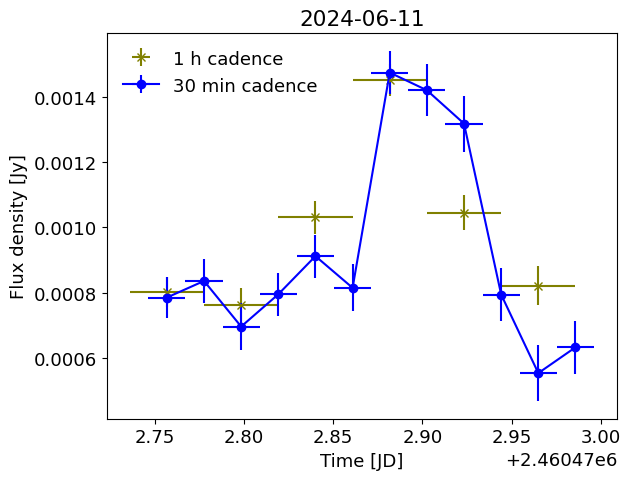

In [2]:
# make a comparison plot
plt.figure(figsize=(6.5, 5))

# make a 30 min timedelta object
thirty_min = 30 / 60 / 24

# make a 15 min timedelta object
fifteen_min = 15 / 60 / 24

# rewrite as plt.errorbar with bkg_rms_J
plt.errorbar(df1["jd"], df1['source_J'], yerr=df1['bkg_rms_J'], xerr=thirty_min, fmt='x', label='1 h cadence', color='olive')
plt.errorbar(df30['jd'], df30['source_J'], yerr=df30['bkg_rms_J'], xerr=fifteen_min, fmt='o-', label='30 min cadence', color='blue')

plt.xlabel('Time [JD]')
plt.ylabel('Flux density [Jy]')

plt.legend(frameon=False)   

plt.title('2024-06-11')

plt.tight_layout()

plt.savefig("../plots/paper/20240611_burst.png", dpi=300)


In [3]:
from astropy.constants import k_B, c, R_sun
import pandas as pd
import numpy as np
import astropy.units as u

all = pd.read_csv("../data/all_timeseries.csv") 
d = 124.7 * u.pc

# calculate the quiescent flux density
all_except = all[all["obsname"] != 20240611]
all_except = all_except[all_except["obsname"] != 20240511]

# get the mean and std of the quiescent flux density
mean_quiescent = all_except.source_J.mean()
std_quiescent = all_except.source_J.std()

print(fr"{mean_quiescent*1e3:.3f} \pm {std_quiescent*1e3:.3f} mJy")


# convert erg/s/Hz using d
l_mean_quiescent = (mean_quiescent * u.Jy * 4 * np.pi * d**2).to(u.erg / u.s / u.Hz)
l_std_quiescent = (std_quiescent * u.Jy * 4 * np.pi * d**2).to(u.erg / u.s / u.Hz)

print(fr"{l_mean_quiescent:.3e} \pm {l_std_quiescent:.3e}")

# get the log10 of mean quiescent luminosity
log10_l_mean_quiescent = np.log10(l_mean_quiescent.value)

print(f"log10 of mean quiescent luminosity: {log10_l_mean_quiescent:.3f}")

# detection threshold for a burst
thresh = mean_quiescent + 3 * std_quiescent

# is the May 11 burst above the threshold?
n_above = np.where((all.loc[all["obsname"] == 20240511, "source_J"] > thresh).values)[0].shape[0]

print(f"Number of points above threshold on May 11: {n_above}")

# get the peak fluxes for May 11 and June 11
maxmay = all.loc[all["obsname"] == 20240511, "source_J"].max()
uncert_maxmay = all.loc[all["obsname"] == 20240511, "bkg_rms_J"].max()
maxjune = all.loc[all["obsname"] == 20240611, "source_J"].max()
uncert_maxjune = all.loc[all["obsname"] == 20240611, "bkg_rms_J"].max()
print(f"Max flux in May: {maxmay*1e3:.3f} \pm {uncert_maxmay:.4f} mJy")
print(f"Max flux in June: {maxjune*1e3:.3f} \pm {uncert_maxjune:.4f} mJy")

# convert maxmay and maxjune to erg/s/Hz
l_maxmay = (maxmay * u.Jy * 4 * np.pi * d**2).to(u.erg / u.s / u.Hz)
l_maxjune = (maxjune * u.Jy * 4 * np.pi * d**2).to(u.erg / u.s / u.Hz)

print(f"Max luminosity in May: {l_maxmay:.3e}")
print(f"Max luminosity in June: {l_maxjune:.3e}")

# get the log10 of max luminosities
log10_l_maxmay = np.log10(l_maxmay.value)
log10_l_maxjune = np.log10(l_maxjune.value)

print(f"log10 of max luminosity in May: {log10_l_maxmay:.3f}")
print(f"log10 of max luminosity in June: {log10_l_maxjune:.3f}")

0.295 \pm 0.097 mJy
5.491e+15 erg / (Hz s) \pm 1.799e+15 erg / (Hz s)
log10 of mean quiescent luminosity: 15.740
Number of points above threshold on May 11: 1
Max flux in May: 0.686 \pm 0.0001 mJy
Max flux in June: 1.451 \pm 0.0001 mJy
Max luminosity in May: 1.277e+16 erg / (Hz s)
Max luminosity in June: 2.699e+16 erg / (Hz s)
log10 of max luminosity in May: 16.106
log10 of max luminosity in June: 16.431


In [4]:
totobsatca = 134.7 * u.hr
freq = 2 / totobsatca

bolenergy = 1e33 * u.erg

xrayenergy = 0.1 * bolenergy

freq.to(1/u.d)

<Quantity 0.35634744 1 / d>

In [5]:
p1 = 1.409779
p2 = 90 / 60 / 24
p2 = 6.9594 /2

1 / (1/p1 + 1/p2) * 2, 1 / (1/p2 - 1/p1) 

(2.0065974253289562, -2.3699493779231187)

In [6]:
(6/7)**2

0.7346938775510203

In [7]:
(6/7)**6 * (1/7)**2

0.008093254216407468

In [8]:
u.mJy

Unit("mJy")

In [15]:

hip67522_params = pd.read_csv('../data/hip67522_params.csv')
radius_rsun = hip67522_params.iloc[4].val
radius_rsun_err = hip67522_params.iloc[4].err

d_err = 0.3 * u.pc
d

<Quantity 124.7 pc>

In [20]:
# intensity 
def brightness_temperature(value, std):

    Sv = value * u.Jy * d**2 / (radius_rsun**2 * R_sun**2)
    Tb = (c**2 * Sv  / (np.pi * 2 * (2.1 * u.GHz)**2 * k_B )).to(u.K)   

    # error propagation
    r = radius_rsun * R_sun
    r_err = radius_rsun_err * R_sun
    
    Sv_err = np.sqrt((d**2 / r**2 * std * u.Jy)**2 + 
                    (2 * d * value * u.Jy / r**2 * d_err)**2 + 
                    (2 * value * u.Jy * d**2 / r**3 * r_err)**2)

    Tb_err = (c**2 * Sv_err  / (2 * np.pi * (2.1 * u.GHz)**2 * k_B )).to(u.K)

    return Tb.value, Tb_err.value

Tb, Tb_err = brightness_temperature(mean_quiescent, std_quiescent)
print(f"Quiescent brightness temperature: {Tb:.2e} \pm {Tb_err:.2e} K")

# same for maxmay and maxjune
Tb_maxmay, Tb_maxmay_err = brightness_temperature(maxmay, uncert_maxmay)
Tb_maxjune, Tb_maxjune_err = brightness_temperature(maxjune, uncert_maxjune)

print(f"Max brightness temperature in May: {Tb_maxmay:.2e} \pm {Tb_maxmay_err:.1e} K")
print(f"Max brightness temperature in June: {Tb_maxjune:.2e} \pm {Tb_maxjune_err:.1e} K")

Quiescent brightness temperature: 1.10e+10 \pm 3.72e+09 K
Max brightness temperature in May: 2.55e+10 \pm 5.8e+09 K
Max brightness temperature in June: 5.40e+10 \pm 5.2e+09 K


In [ ]:
 0.295e-3 / (3.14*(1.39*7e10)**2 / (3e18*d)**2) * (3e8/2.1e9)**2 / 2 / 1380 / 1e10

value / pi * r^2 / d^2 * c^2 / nu^2 / 2 / kB

In [22]:
(4 * u.deg / 6000).to(u.arcsec)

<Quantity 2.4 arcsec>

In [17]:
(3e18 * d.value * u.cm).to(u.pc)
k_B.to(u.erg / u.K)

<Quantity 1.380649e-16 erg / K>

In [9]:
beam_major = 7.04 * u.arcsec
beam_minor = 3.74 * u.arcsec

beam_size = np.pi * beam_major * beam_minor / (4 * np.log(2))
beam_size.to(u.arcsec**2)

<Quantity 29.8338074 arcsec2>

In [10]:
(Tb_maxjune * u.K * k_B).to(u.keV)

<Quantity 14821.70733273 keV>

In [11]:
(30.76 - 18.97) * 1.36

16.034400000000005

In [12]:
10**30.5

3.1622776601683795e+30

In [13]:
6.5/11.6, 11.4/11.6, 23.0/11.6


(0.560344827586207, 0.9827586206896552, 1.9827586206896552)

In [14]:
np.log10((8.856263118e-13 * u.erg / u.s / u.cm**2 * 4 * np.pi * d**2).to(u.erg / u.s).value)

30.21689437229751

In [15]:
import numpy as np
1e-14 / (4 * np.pi * d**2)

(1e-14 / (4 * np.pi * d.to("cm").value**2)) * 10**52.9

0.0004269294742736174

In [16]:
10**30.5, 10**30.22

(3.1622776601683795e+30, 1.6595869074375563e+30)

In [18]:
Sv = 3e-4 * u.Jy * d**2 / (radius_rsun**2 * R_sun**2)
Sv.to("Jy")

<Quantity 4.81895724e+15 Jy>

In [19]:
radius_rsun

1.38